In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
data=pd.read_csv("Iris Flower - Iris.csv")

In [29]:
data=data.drop(["Id"],axis=1)

In [30]:
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='Species', ylabel='count'>

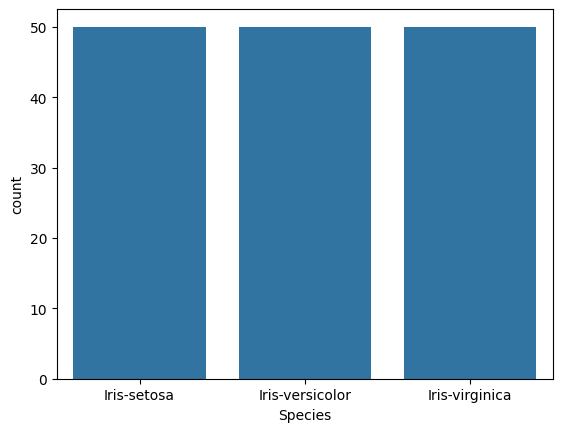

In [31]:
sns.countplot(x='Species', data=data)

In [32]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Species"] = le.fit_transform(data["Species"])

<Axes: >

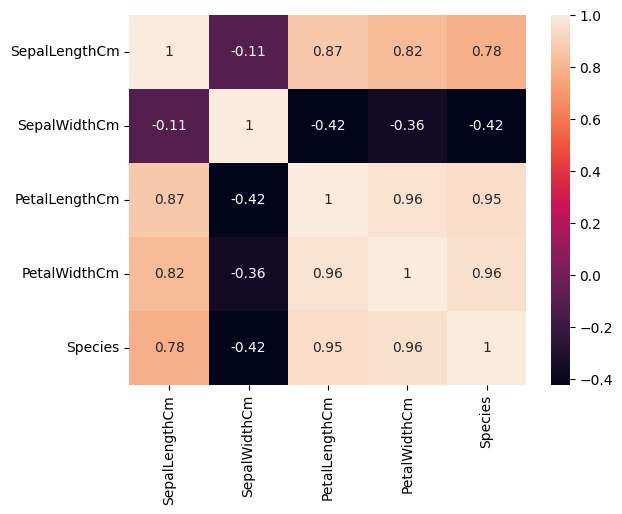

In [34]:
sns.heatmap(data.corr(),annot=True)

In [37]:
from sklearn.cluster import KMeans
inertia=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

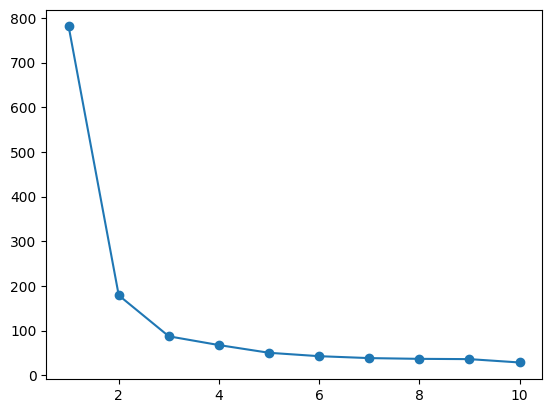

In [38]:
plt.plot(range(1,11),inertia,marker="o")
plt.show()

In [39]:
X = data.drop('Species', axis=1)
cluster=3
kmeans=KMeans(n_clusters=cluster,random_state=42)
kmeans.fit(X)
data["Clusters"]=kmeans.labels_

In [40]:
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [41]:
data["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [42]:
data["Clusters"].value_counts()

Clusters
2    61
1    50
0    39
Name: count, dtype: int64

<Axes: xlabel='Clusters', ylabel='count'>

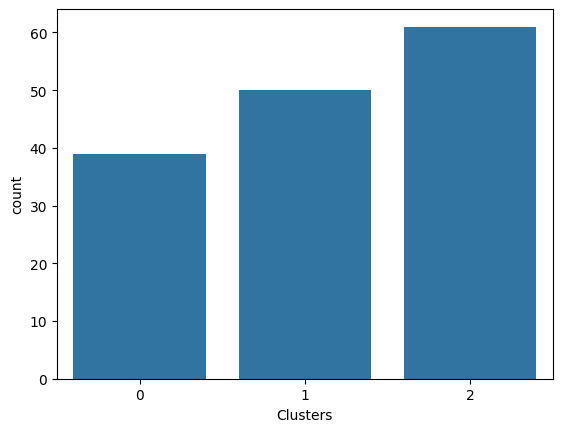

In [45]:
sns.countplot(x="Clusters",data=data)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

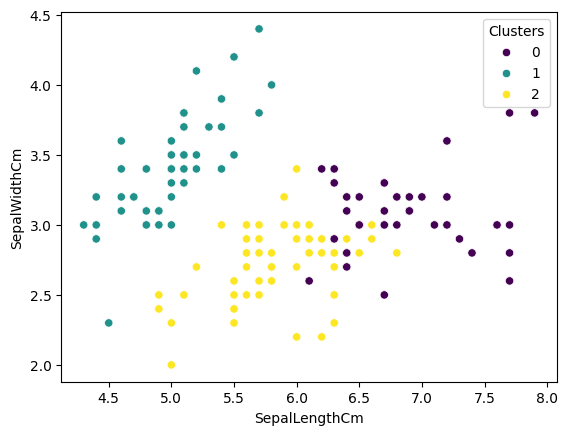

In [51]:
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=data,hue="Clusters",palette="viridis")

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [54]:
x=data.drop(["Species","Clusters"],axis=1)
y=data["Species"]

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
y_pred=rfc.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix,ConfusionMatrixDisplay

In [69]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average="macro")
recall=recall_score(y_test,y_pred,average="macro")
f1=f1_score(y_test,y_pred,average="macro")
print("Accuracy :",accuracy*100)
print("Precision :",precision*100)
print("Recall :",recall*100)
print("F1 Score :",f1*100)

Accuracy : 100.0
Precision : 100.0
Recall : 100.0
F1 Score : 100.0


In [70]:
conf_matrix=confusion_matrix(y_test,y_pred)

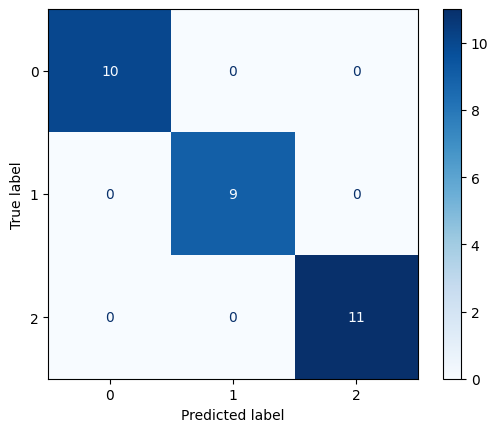

In [74]:
cmd=ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cmd.plot(cmap="Blues")
plt.show()